In [1]:
# Packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#np.random.seed(42)


In [38]:
# Population
df = pd.read_excel('nba_ht_wt.xls')
df.head()

,Player,Pos,Height,Weight,Age,School,BDate
0,Vitor Faverani,C,83,260,25,None,1988-05-05
1,Avery Bradley,G,74,180,22,Texas,1990-11-26
2,Keith Bogans,G,77,215,33,Kentucky,1980-05-12
3,Jared Sullinger,F,81,260,21,Ohio State,1992-03-04
4,Jeff Green,F,81,235,27,Georgetown,1986-08-28


In [5]:
df.shape

(505, 7)

In [6]:
df = df[['Weight']]
df.head()

,Weight
0,260
1,180
2,215
3,260
4,235


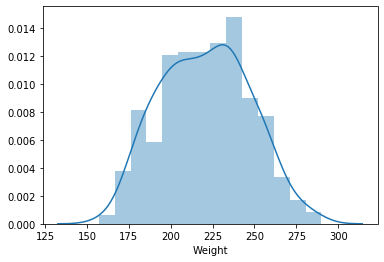

In [7]:
#Population distribution for the column Weight. We can see that it is distibuted normally distributed.
sns.distplot(df.Weight)
plt.show()

Now find the POPULATION MEAN

In [8]:
df.Weight.mean()

220.67326732673268

This is the true mean weight of the population. This is the population parameter, the ground truth.  

Let's take a random sample from this data, and see what mean we get. Let's take the sample size 30 and find its mean

In [9]:
samp_size = 30

In [10]:
df.Weight.sample(samp_size).mean()

223.43333333333334

Quite different from the population mean, right?  
Let's take another sample.

In [11]:
df.Weight.sample(samp_size).mean()

224.13333333333333

This also differs from the population mean, right?
Let's take another sample.
And another.

In [12]:
df.Weight.sample(samp_size).mean()

213.63333333333333

Each time we take a sample, our sample mean value is different from population mean. There is variability in the sample mean itself. To conform that sample mean and population mean to be equal we need to take more samples(say 1000).
Total number of samples = 1000. Sample_size = 30

In [40]:
sample_means = [df.Weight.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

In [14]:
len(sample_means)

1000

Now we have to verify the 3 properties
1.Sampling distribution’s mean (μ¯X) = Population mean (μ),
2.Sampling distribution’s standard deviation (standard error) = σ√n, and
3.For n > 30, the sampling distribution becomes a normal distribution.

Does the sample mean itself follow a normal distribution?(3rd property) Let's assess this.
Plotting the density for the sample means. Yes it follows. Please find the below plot.It follows Normal distribution. Our 3rd property gets satisfied

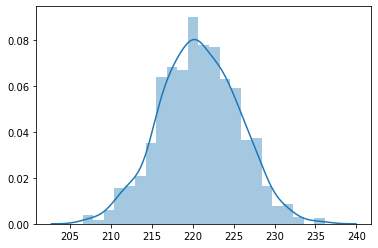

In [15]:
sns.distplot(sample_means)
plt.show()

Which distribution does this look like?  -NORMAL DISTRIBUTION

In [16]:
sample_means.mean()

220.78186666666662

Sample mean and Population mean are equal now. 1st property is verified.

In [17]:
sample_means.std()

4.774509213685199

Population std vs. std of sampling mean

In [18]:
df.Weight.std()/np.sqrt(samp_size)

4.864344202231697

Sample distribution's Standard deviation is equal to σ√n where σ - Population Standard deviation. So our third property is also verified.

Let's make sure we got this right.
 - What happened here?
 - What is a sampling distribution
 - What is expected to follow a normal distribution?

#### Claim: This phenomenon occurs, rather, this theorem holds regardless of the underying populations distribution.
That seems very far fetched. We'll need to see it to believe it.

In [39]:
df1 = pd.read_csv("exp_data.csv")

In [34]:
df1.head()

,VAL
0,362
1,361
2,360
3,359
4,358


In [35]:
df1.shape

(1112, 1)

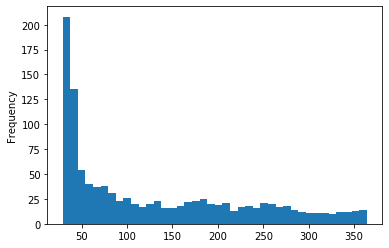

In [36]:
df1.VAL.plot.hist(bins=40)
plt.show()

Here the Population distribution follows exponential distribution

After picking some samples and if we try to plot the Sample mean distribution it has to be Normally distributes irrespective of the population distribution. Please see below.

Let's pick samples from this distribution, record their means, and plot the sampling distribution.

In [23]:
samp_size = 50

In [24]:
sample_means = [df1.VAL.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

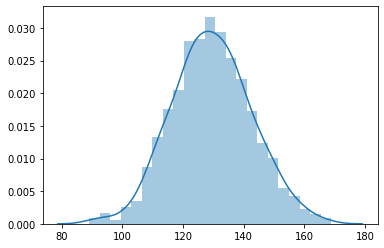

In [25]:
sns.distplot(sample_means)
plt.show()

In [26]:
sample_means.mean()

129.55620000000002

In [27]:
df1.VAL.mean()

130.4181654676259

In [28]:
sample_means.std()

13.152911336910796

In [29]:
df1.VAL.std()/np.sqrt(samp_size)

14.060457446377631

Above steps shows that all three properties of CLT has been verified.

### Effect of sample size

Below plot is drawn to verify, as the sample size increases, we will get an accurate Normal distribution.It can be clearly seen at n = 200,100,50

In [42]:
sample_sizes = [3, 10, 30, 50, 100, 200]

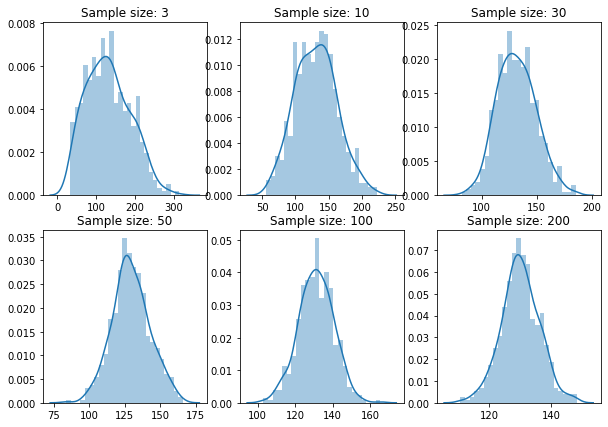

In [37]:
plt.figure(figsize=[10,7])
for ind, samp_size in enumerate(sample_sizes):
    sample_means = [df1.VAL.sample(samp_size).mean() for i in range(500)]
    plt.subplot(2,3,ind+1)
    sns.distplot(sample_means, bins=25)
    plt.title("Sample size: "+str(samp_size))
plt.show()

What is the significance of this, and why is it useful? Used in the industry?